In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

# filename = '/Users/roberto/data/combined_data.csv';
filename = '/Users/roberto/data/RO-logging/datasets/ro-eigenvecs/maxEVecs-ro-dataset.csv';
print('Reading from: ' + filename)
df_combined_data = pd.read_csv(filename, names=range(2400))
df_maxEVecs = df_combined_data.iloc[:,1:] #pd.read_csv(filename, names=range(2400))

df_labels = df_combined_data.iloc[:,0:1]
labels = np.copy(df_labels.values)
labels = labels.T

[m,n] = shape(df_maxEVecs)

print("Shape of max eigenvecs is:\n",shape(df_maxEVecs))
print("Shape of labels is:\n",shape(df_labels))
print("Shape of data is:\n",shape(df_combined_data))

Reading from: /Users/roberto/data/RO-logging/datasets/ro-eigenvecs/maxEVecs-ro-dataset.csv
Shape of max eigenvecs is:
 (4050, 2399)
Shape of labels is:
 (4050, 1)
Shape of data is:
 (4050, 2400)


In [3]:
df_labels.head()

,0
0,-1
1,1
2,-1
3,1
4,1


In [161]:
where_are_NaNs = isnan(df_maxEVecs)
df_maxEVecs[where_are_NaNs] = 0.0
df_maxEVecs.head()

,1,2,3,4,5,6,7,8,9,10,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.055188,0.055134,0.054691,0.054660,0.054297,0.054235,0.054081,0.053936,0.053916,0.053564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048210,0.048132,0.047873,0.047718,0.047692,0.047536,0.047510,0.046963,0.046946,0.046893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046924,0.046866,0.046826,0.046803,0.046800,0.046763,0.046757,0.046740,0.046727,0.046722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048380,0.048370,0.047862,0.047606,0.047594,0.047398,0.047365,0.047198,0.046985,0.046898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.046600,0.046343,0.046296,0.046226,0.046211,0.046182,0.046171,0.045847,0.045751,0.045631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
# Handcrafted features for all data (train and test data)
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = []
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)
q1_vals = []
q3_vals = []
iqr_vals = []
area_under_curve = []

for i in range(m):
    q1_index = int(round(num_landmarks[i]/4))
    q1_vals.append(eigenvectors[i,q1_index])
    q3_index = int(round(num_landmarks[i]*3/4))
    q3_vals.append(eigenvectors[i,q3_index])
    iqr_vals.append(q1_vals[-1]-q3_vals[-1])
    
    temp_sum = 0;
    for j in range(n):
        temp_sum += eigenvectors[i,j]
    area_under_curve.append(temp_sum)
    
previous_max_vals = [max_vals[0]]
previous_max_vals = np.append(previous_max_vals,max_vals[0:m-1])
previous_num_landmarks = [num_landmarks[0]]
previous_num_landmarks = np.append(previous_num_landmarks,num_landmarks[0:m-1])
previous_q1_vals = [q1_vals[0]]
previous_q1_vals = np.append(previous_q1_vals,q1_vals[0:m-1])
previous_q3_vals = [q3_vals[0]]
previous_q3_vals = np.append(previous_q3_vals,q3_vals[0:m-1])
previous_iqr_vals = [iqr_vals[0]]
previous_iqr_vals = np.append(previous_iqr_vals,iqr_vals[0:m-1])
previous_area_under_curve = [area_under_curve[0]]
previous_area_under_curve = np.append(previous_area_under_curve,area_under_curve[0:m-1])

In [163]:
# temp_dict = {'max_vals':max_vals,'num_landmarks':num_landmarks,
#              'q1_vals':q1_vals,'q3_vals':q3_vals,'iqr_vals':iqr_vals,
#             'area_under_curve':area_under_curve,
#             'previous_max_vals':previous_max_vals,
#             'previous_num_landmarks':previous_num_landmarks,
#             'previous_q1_vals':previous_q1_vals,
#             'previous_q3_vals':previous_q3_vals,
#             'previous_iqr_vals':previous_iqr_vals,
#             'previous_area_under_curve':previous_area_under_curve}

temp_dict = {'max_vals':max_vals,'num_landmarks':num_landmarks,
            'area_under_curve':area_under_curve,
            'previous_max_vals':previous_max_vals,
            'previous_num_landmarks':previous_num_landmarks,
            'previous_area_under_curve':previous_area_under_curve}

df_features = pd.DataFrame(data = temp_dict)
df_features.head()

,max_vals,num_landmarks,area_under_curve,previous_max_vals,previous_num_landmarks,previous_area_under_curve
0,0.055188,663,24.278510,0.055188,663,24.278510
1,0.048210,706,24.571914,0.055188,663,24.278510
2,0.046924,706,25.139728,0.048210,706,24.571914
3,0.048380,696,25.407189,0.046924,706,25.139728
4,0.046600,650,24.884763,0.048380,696,25.407189


In [164]:
print(num_landmarks[0])
print(np.count_nonzero(eigenvectors[0,0:1800],axis=0))

663
663


In [165]:
from sklearn.model_selection import StratifiedShuffleSplit

print('Good RO: ',np.count_nonzero(labels==-1))
print('Bad RO:',np.count_nonzero(labels==1),'\n')

X_total = np.copy(df_features.values)
y_total = np.copy(ravel(labels))

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=0)

for train_index, test_index in sss.split(X_total, y_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    eig_train, eig_test = df_maxEVecs.values[train_index], df_maxEVecs.values[test_index]

print('Good vs Bad RO in training: ',np.count_nonzero(y_train==-1),'good,',np.count_nonzero(y_train==1),'bad')
print('Good vs Bad RO in testing:',np.count_nonzero(y_test==-1),'good,',np.count_nonzero(y_test==1),'bad \n')

print('Good/Bad ratio in training: ',np.count_nonzero(y_train==-1)/np.count_nonzero(y_train==1))
print('Good/Bad ratio in testing:',np.count_nonzero(y_test==-1)/np.count_nonzero(y_test==1),'\n')

# print('Bad RO % in training: ',np.count_nonzero(y_train==1)/np.count_nonzero(labels==1))
# print('Bad RO % in testing:',np.count_nonzero(y_test==1)/np.count_nonzero(labels==1),'\n')

print('Bad RO % in training: ',np.count_nonzero(y_train==1)/len(y_train))
print('Bad RO % in testing:',np.count_nonzero(y_test==1)/len(y_test),'\n')

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Good RO:  3530
Bad RO: 520 

Good vs Bad RO in training:  2824 good, 416 bad
Good vs Bad RO in testing: 706 good, 104 bad 

Good/Bad ratio in training:  6.788461538461538
Good/Bad ratio in testing: 6.788461538461538 

Bad RO % in training:  0.12839506172839507
Bad RO % in testing: 0.12839506172839507 

Size of training data is: 
 (3240, 6)
Size of test data is: 
 (810, 6)


In [166]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
# scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_scaled = preprocessing.scale(X_train)
print("Mean: ",X_scaled.mean(axis=0))
print("Variance: ",X_scaled.std(axis=0))

Mean:  [-9.78608055e-15  5.62307402e-17 -6.13021294e-16  1.87927755e-14
  2.30782471e-17 -1.33997751e-16]
Variance:  [1. 1. 1. 1. 1. 1.]


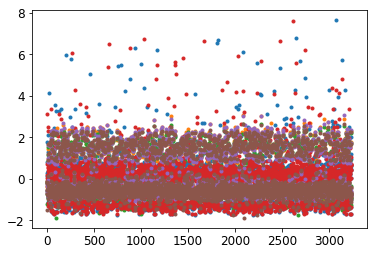

In [167]:
# print(X_scaled[:,1])
# print(var(X_scaled[:,1]))
plt.plot(X_scaled,'.');

In [168]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

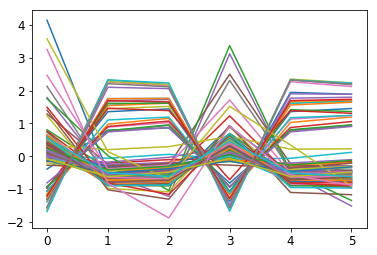

In [169]:
plt.plot(X_train[0:100,:].T,'-');

In [170]:
label_colours = []   
test_colours = []
for i in range(m_train):
    if(y_train[i] == 1):
        label_colours.append('red')
    else:
        label_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        test_colours.append('red')
    else:
        test_colours.append('blue')

# plt.figure(figsize=(15,5))

# for i in range(m_train):
#     plt.subplot(121)
#     plt.plot(eig_train[i,:].T, color=label_colours[i]);
#     plt.title("Training data", fontsize=16)

# for i in range(m_test):
#     plt.subplot(122)
#     plt.plot(eig_test[i,:].T, color=test_colours[i]);
#     plt.title("Test data", fontsize=16)

In [171]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# SVM Classifier model
# svm_clf = SVC(kernel="rbf",class_weight='balanced', C=float(100000))
clf = SVC(kernel="rbf",class_weight='balanced', C=float(1000),random_state=0)
print(clf.fit(X_train, y_train))
clf.score(X_test,y_test)

# Random Forest
# clf = RandomForestClassifier(n_estimators=10)
# clf = clf.fit(X_train,y_train)

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


0.9197530864197531

In [172]:
print('Testing on X data with shape: ',shape(X_test))
predictions = clf.predict(X_test)
successes = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        successes+=1   
print('Successes: ',successes,' out of ',len(y_test))
print('Classification accuracy = ',successes/len(y_test))

Testing on X data with shape:  (810, 6)
Successes:  745  out of  810
Classification accuracy =  0.9197530864197531


In [173]:
# predict_colours = []
# correct_colours = []
# for i in range(m_test):
#     if(predictions[i] == 1):
#         predict_colours.append('red')
#     else:
#         predict_colours.append('blue')
# for i in range(m_test):
#     if(y_test[i] == 1):
#         correct_colours.append('red')
#     else:
#         correct_colours.append('blue')

# plt.figure(figsize=(15,5))
# for i in range(m_test):
# #     if(i%20 ==0):
#         plt.subplot(121)
#         plt.plot(eig_test[i,:].T, color=predict_colours[i]);
#         plt.title("Predictions", fontsize=16)

#         plt.subplot(122)
#         plt.plot(eig_test[i,:].T, color=correct_colours[i]);
#         plt.title("Ground truth", fontsize=16)

In [174]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics.scorer import make_scorer

scoring = ['precision_macro', 'recall_macro']

scores = cross_validate(clf,X_train,y_train, scoring=scoring,cv=5,return_train_score=True)
scores

{'fit_time': array([0.39501214, 0.35076308, 0.4348731 , 0.39469194, 0.45802307]),
 'score_time': array([0.01801491, 0.01926184, 0.02314806, 0.01879001, 0.02163696]),
 'test_precision_macro': array([0.75060262, 0.79400563, 0.75378788, 0.82835145, 0.82220773]),
 'train_precision_macro': array([0.81841374, 0.82579481, 0.83184628, 0.81300981, 0.83534394]),
 'test_recall_macro': array([0.83734724, 0.84075061, 0.8428937 , 0.87104169, 0.864084  ]),
 'train_recall_macro': array([0.9018191 , 0.90934759, 0.91239845, 0.89896271, 0.90667437])}

In [175]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[2615,  209],
       [  93,  323]])

In [177]:
from sklearn.metrics import precision_score, recall_score
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred),'\n')

from sklearn.metrics import f1_score
print('F1 score: \n',f1_score(y_train,y_train_pred))

Precision (% when positive prediction is correct):
 0.6071428571428571 

Recall (% of bad RO instances detected):
 0.7764423076923077 

F1 score: 
 0.6814345991561181


In [178]:
from sklearn.model_selection import cross_val_score
y_scores = cross_val_predict(clf, X_train, y_train, cv=5,
                                 method="decision_function")
# y_scores = cross_val_predict(clf, X_train, y_train, cv=3)

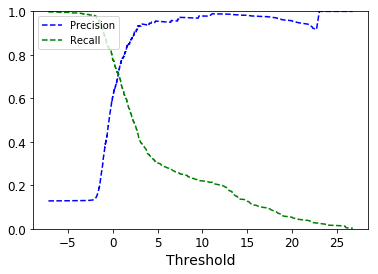

In [179]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

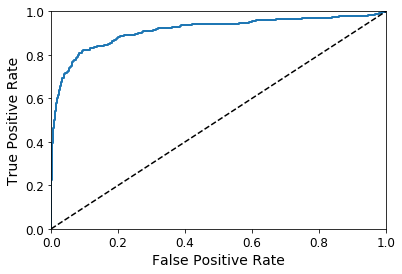

Area under ROC curve 0.9128060988232729


In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

print('Area under ROC curve',roc_auc_score(y_train, y_scores))

In [181]:
# Need to set all bad RO labels from -1 to 0 for this function to work
indices = [i for i, x in enumerate(y_train) if x == -1]
y_train[indices] = 0

y_train_pred_thresholding = (y_scores > -1)
print(y_train.shape)
print(y_train)
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred_thresholding),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred_thresholding),'\n')

(3240,)
[0 1 0 ... 0 0 0]
Precision (% when positive prediction is correct):
 0.3363309352517986 

Recall (% of bad RO instances detected):
 0.8990384615384616 

